<a href="https://colab.research.google.com/github/nhlong1512/IS403.N21/blob/main/Final/Final04052023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
path = 'BTC-USD.csv'

df = pd.read_csv(path)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09


Kiểm tra tính dừng 
<br/>
**ADF Statistic**: giá trị thống kê của Augmented Dickey-Fuller Test, được sử dụng để kiểm tra tính dừng của chuỗi thời gian. Nếu giá trị này nhỏ hơn các giá trị ngưỡng (được xác định theo mức ý nghĩa của kiểm định), thì có thể kết luận rằng chuỗi thời gian là có tính dừng.

In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.569579
p-value: 0.498854


Vì p-values > 0.05 nên chúng ta sẽ thực hiện sai phân xem biểu đồ tương quan hoạt động như thế nào.

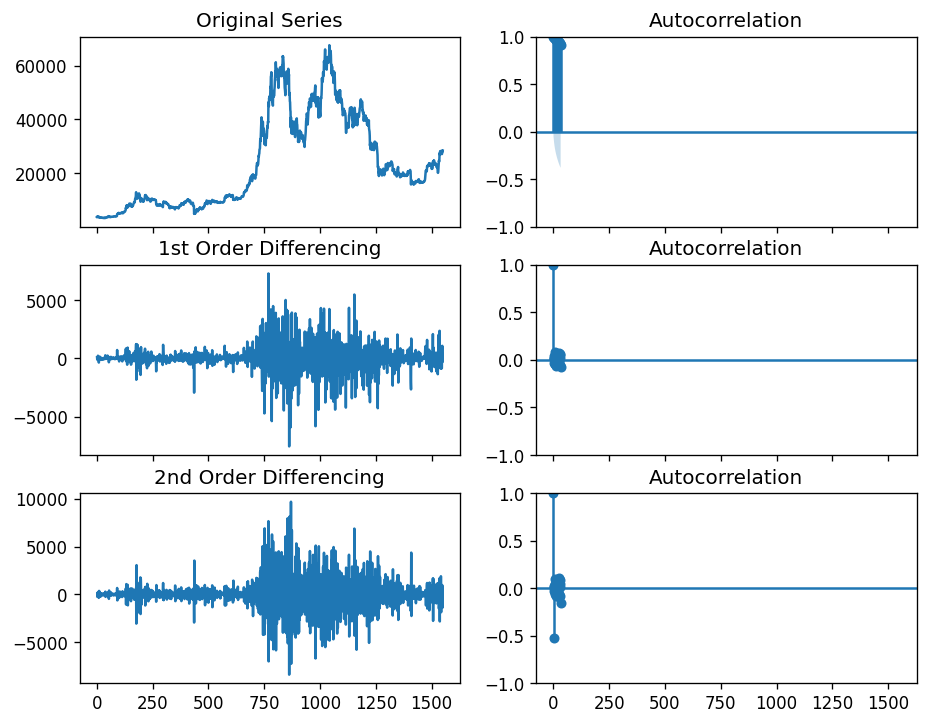

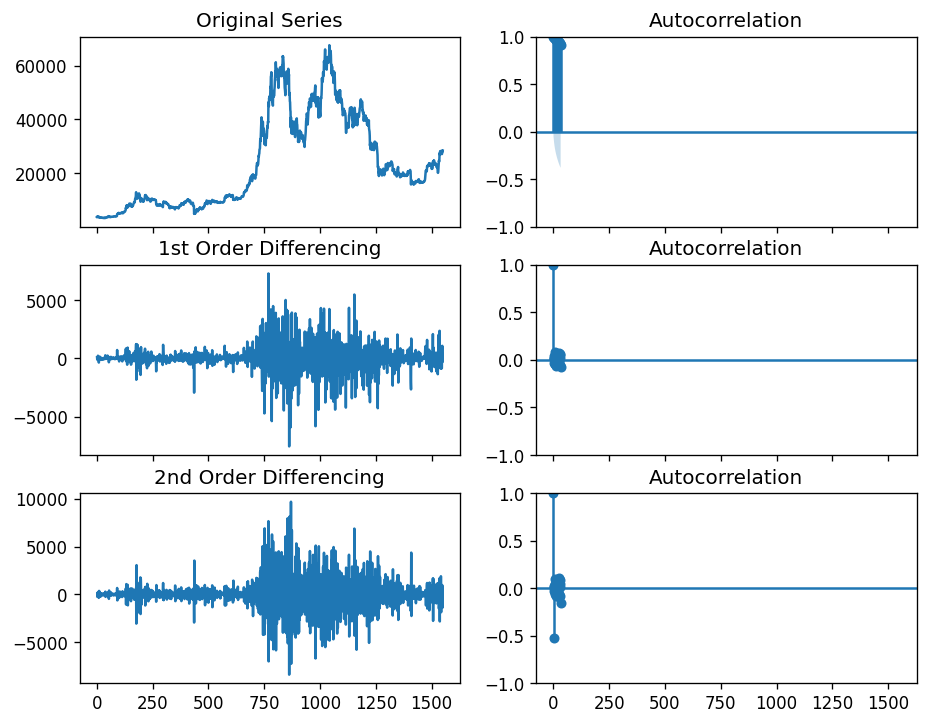

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])


Đối với dữ liệu trên, chúng ta có thể thấy rằng chuỗi thời gian đạt đến trạng thái dừng với sai phân bậc 2.

**<h3>Xác định p (AR) dựa trên PACF</h3>**

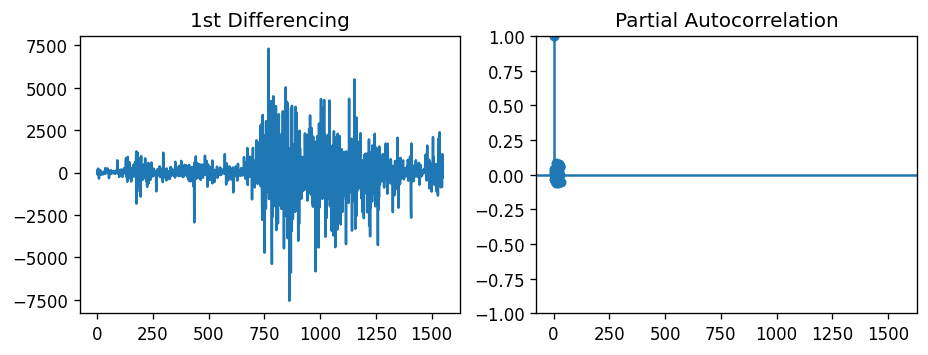

In [28]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Close.diff().dropna(), ax=axes[1])

plt.show()

Chúng ta có thể thấy rằng giá trị PACF của lag 1 là khá đáng kể vì nó nằm trên đường ý nghĩa. Vì vậy, chúng ta sẽ xác định giá trị của p là 1.

**<h3>Xác định q (MA) dựa trên ACF</h3>**

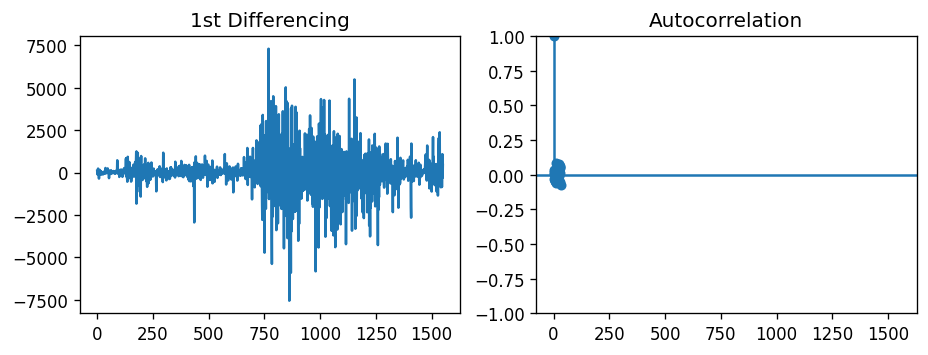

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Close.diff().dropna(), ax=axes[1])

plt.show()

Chúng ta có thể thấy rằng giá trị ACF của lag 1 là khá đáng kể vì nó nằm trên đường ý nghĩa. Vì vậy, chúng ta sẽ xác định giá trị của q là 1.

**<h3>Xây dựng mô hình ARIMA</h3>**

Bây giờ, chúng ta đã xác định được các giá trị của p, d và q. Chúng tôi có mọi thứ cần thiết để phù hợp với mô hình ARIMA. Chúng tôi sẽ sử dụng triển khai ARIMA() trong gói statsmodels.

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Close, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1551
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -13049.426
Date:                Thu, 04 May 2023   AIC                          26106.853
Time:                        04:39:38   BIC                          26128.239
Sample:                             0   HQIC                         26114.807
                               - 1551                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.349e+04   9727.840      2.415      0.016    4424.076    4.26e+04
ar.L1          0.9977      0.001    759.636      0.000       0.995       1.000
ma.L1         -0.0278      0.018     -1.534      0.1

In [29]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00


In [38]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
model = pm.auto_arima(df.Close, start_p=0, start_q=0,max_p=5, max_q=5, m=12,start_P=0, seasonal=False,d=0, D=0, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

print(model.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36279.536, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=34218.160, Time=1.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26107.157, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26108.642, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26109.006, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=4.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26110.589, Time=1.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26107.301, Time=0.91 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 9.016 seconds
26107.156666437244
